# Capstone Project - The Battle of Neighborhoods
## WK4 and WK5 - Buying a house

## Introduction

The purpose of this project is using the skills and the tools in previous weeks and lessons to use location data to explore a geographical location together with Foursquare location data to explore or compare neighborhoods or cities of choice or a problem to solve.

## Scenario

The lockdown is going to end, so it is a good time to explore the opportunity to get a new home in Sheffield, UK. I stayed there before and I love there. I have the following requirements:

1. It should be convenince to get foods and daily essentials.
2. Low crime rate
3. People with nmoderate and above income. 
4. With certain populations and avoid too countryside area.

## Data Source

The following data will be used in the works:
1. Geo information from geolocator API
2. Sheffield postal code, https://www.postcodearea.co.uk/postaltowns/sheffield/
3. Sheffield postal code map, https://en.wikipedia.org/wiki/S_postcode_area
4. UK Crime map, https://www.ukcrimestats.com/
5. Foursquare API

Sadly they are not in JSON or well formatted, they will be formatted as csv to import.

## 1. Download and Explore Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

!conda install -c anaconda beautifulsoup4 -y

from urllib.request import urlopen
from bs4 import BeautifulSoup

import numpy as np # library to handle data in a vectorized manner
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - beautifulsoup4


The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    conda-forge::ca-certificates-2020.12.~ --> anaconda::ca-certificates-2020.10.14-0
  certifi            conda-forge::certifi-2020.12.5-py36h5~ --> anaconda::certifi-2020.6.20-py36_0
  openssl            conda-forge::openssl-1.1.1j-h7f98852_0 --> anaconda::openssl-1.1.1h-h7b6447c_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be UPDATED:

  ca-certificates    anaconda::ca-certificates-2020.10.14-0 --> conda-forge::ca-certificates-2020.12.5-ha878542_0
  certifi                anaconda::certifi-2020.6.20-py36_0 --> conda-forge::certif

In [6]:
#Read data
df=pd.read_csv('neighborhood.csv')

#Collect Postal Code mapping
df_area = df[{'Postal Code', 'Area'}]
df_area.set_index('Postal Code')
df_area.rename(columns={"Postal Code": "postal_code", "Area": "name"}, inplace=True)
df_area

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,postal_code,name
0,S1,Orchard Square
1,S2,Arbourthorne
2,S3,Burngreave
3,S4,Grimesthorpe
4,S5,Firth Park
5,S6,Hillsborough
6,S7,Beauchief
7,S8,Norton Woodseats
8,S9,Attercliffe
9,S10,Fulwood


In [7]:
print('The dataframe has {} area and {} neighborhoods.'.format(
        len(df_area['name'].unique()),
        df.shape[0]
    )
)

The dataframe has 43 area and 45 neighborhoods.


In [8]:
#Tranverse separated neighborhood into multiple column and map with area
df.rename(columns={"Postal Code": "postal_code", "Area": "area", "Neighborhood": "neighborhood"}, inplace=True)
df['neighborhood'] = df['neighborhood'].str.split(',')
#df=df.reset_index(['postal_code'])
df = df.explode('neighborhood')
df["neighborhood"]  = df["neighborhood"].str.strip()
#print(df['neighborhood'])

pd.options.mode.chained_assignment = None 
df_neighborhood = pd.merge(df, df_area, left_on = 'neighborhood', right_on = 'postal_code',  how='left')
df_neighborhood.drop(['neighborhood'], axis=1, inplace=True)
df_neighborhood.rename(columns={"postal_code_x": "postal_code", "name": "neighborhood", 'postal_code_y' : "neighborhood_postal_code"}, inplace=True)

#df_neighborhood=df_neighborhood.reset_index([0, 'area'])
df_neighborhood.head()


,postal_code,area,neighborhood_postal_code,neighborhood
0,S1,Orchard Square,S2,Arbourthorne
1,S1,Orchard Square,S3,Burngreave
2,S1,Orchard Square,S4,Grimesthorpe
3,S1,Orchard Square,S6,Hillsborough
4,S1,Orchard Square,S10,Fulwood


In [9]:
#Address tester
address = 'The Meadows, Todwick, Sheffield S26'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address + ', United Kingdom')
print(location)
if location is None:
    location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(location, latitude, longitude))

Kiveton Park Meadows Junior School, Storth Lane, Wales, Rotherham, Yorkshire and the Humber, England, S26 5QT, United Kingdom
The geograpical coordinate of Kiveton Park Meadows Junior School, Storth Lane, Wales, Rotherham, Yorkshire and the Humber, England, S26 5QT, United Kingdom are 53.3461131, -1.2767591265409763.


In [10]:
df_area_xy = df_neighborhood[{'postal_code','area'}]
df_area_xy.drop_duplicates(subset=['postal_code'], inplace=True)
df_area_xy

,area,postal_code
0,Orchard Square,S1
6,Arbourthorne,S2
13,Burngreave,S3
18,Grimesthorpe,S4
21,Firth Park,S5
26,Hillsborough,S6
31,Beauchief,S7
35,Norton Woodseats,S8
39,Attercliffe,S9
45,Fulwood,S10


In [11]:
#Collect coordinate and merge back to df
latitude = [] 
longitude = [] 

geolocator = Nominatim(user_agent="ny_explorer")
for index, row in df_area_xy.iterrows(): 
    location = geolocator.geocode(row['area'] + ' ' + row['postal_code'] +', Sheffield, United Kingdom') #More accurate
    if location is None:
        location = geolocator.geocode(row['area']+ ' ' + row['postal_code'] + ', United Kingdom') #Handle exception case
    #print('The geograpical coordinate of {}.'.format(row['neighbourhood']))
    if location is not None:
        latitude.append(location.latitude) 
        longitude.append(location.longitude)
        print('The geograpical coordinate of {} are {}, {}.'.format(location, location.latitude, location.longitude))
    else:
        latitude.append(np.nan)
        longitude.append(np.nan)
df_area_xy['latitude'] = latitude
df_area_xy['longitude'] = longitude
df_area_xy.head

The geograpical coordinate of Orchard Square, City Centre, Sheffield, Yorkshire and the Humber, England, S1 2FB, United Kingdom are 53.3816738, -1.4705044.
The geograpical coordinate of Arbourthorne, Sheffield, Yorkshire and the Humber, England, S2 2FL, United Kingdom are 53.3613888, -1.4431226.
The geograpical coordinate of Burngreave, Sheffield, Yorkshire and the Humber, England, S4 7HQ, United Kingdom are 53.3939876, -1.45832.
The geograpical coordinate of Grimesthorpe, Sheffield, Yorkshire and the Humber, England, S4 8EZ, United Kingdom are 53.4070424, -1.4397035.
The geograpical coordinate of Firth Park, Sheffield, Yorkshire and the Humber, England, S5 6HB, United Kingdom are 53.4184353, -1.4462956.
The geograpical coordinate of Hillsborough Stadium, Penistone Road North, Middlewood, Wadsley Bridge, Sheffield, Yorkshire and the Humber, England, S6 1SW, United Kingdom are 53.4113729, -1.5006348419862217.
The geograpical coordinate of Beauchief, Sheffield, Yorkshire and the Humber, 

<bound method NDFrame.head of                          area postal_code   latitude  longitude
0              Orchard Square          S1  53.381674  -1.470504
6                Arbourthorne          S2  53.361389  -1.443123
13                 Burngreave          S3  53.393988  -1.458320
18               Grimesthorpe          S4  53.407042  -1.439704
21                 Firth Park          S5  53.418435  -1.446296
26               Hillsborough          S6  53.411373  -1.500635
31                  Beauchief          S7  53.335309  -1.500887
35           Norton Woodseats          S8  53.327421  -1.473432
39                Attercliffe          S9  53.392270  -1.430267
45                    Fulwood         S10  53.365013  -1.543243
51                  Ecclesall         S11  53.355774  -1.511037
55               Hackenthorpe         S12  53.343606  -1.381049
62                 Handsworth         S13  53.372300  -1.383012
68                 Rollestone         S14  53.346896  -1.441027
72        

In [12]:
#Clean up and remove NaN data.

pd.options.mode.chained_assignment = None 
df_neighborhood_1 = pd.merge(df_neighborhood, df_area_xy, left_on = 'neighborhood_postal_code', right_on = 'postal_code',  how='left')
df_neighborhood_1.drop(['postal_code_y','area_y'], axis=1, inplace=True)
df_neighborhood_1.rename(columns={"postal_code_x": "postal_code", "area_x": "area"}, inplace=True)

#Clean up NaN
df_neighborhood_1.dropna(subset=["latitude"], axis=0, how='all', inplace=True)
df_neighborhood = df_neighborhood_1
df_neighborhood

,postal_code,area,neighborhood_postal_code,neighborhood,latitude,longitude
0,S1,Orchard Square,S2,Arbourthorne,53.361389,-1.443123
1,S1,Orchard Square,S3,Burngreave,53.393988,-1.458320
2,S1,Orchard Square,S4,Grimesthorpe,53.407042,-1.439704
3,S1,Orchard Square,S6,Hillsborough,53.411373,-1.500635
4,S1,Orchard Square,S10,Fulwood,53.365013,-1.543243
5,S1,Orchard Square,S11,Ecclesall,53.355774,-1.511037
6,S2,Arbourthorne,S14,Rollestone,53.346896,-1.441027
7,S2,Arbourthorne,S12,Hackenthorpe,53.343606,-1.381049
8,S2,Arbourthorne,S13,Handsworth,53.372300,-1.383012
9,S2,Arbourthorne,S8,Norton Woodseats,53.327421,-1.473432


In [13]:
#Get coordinate for Sheffield City Centre
address = 'Sheffield S1, United Kingdom'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(address, latitude, longitude))

The geograpical coordinate of Sheffield S1, United Kingdom are 53.3783713, -1.4621381.


In [14]:
#Toronto and neighbourhood

map_sheffield = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, area, neighborhood in zip(df_neighborhood['latitude'], df_neighborhood['longitude'], df_neighborhood['area'], df_neighborhood['neighborhood']):
    label = '{}, {}'.format(neighborhood, area)
    label = folium.Popup(label, parse_html=True)
    #print(str(lat) +', ' + str(lng))
    folium.CircleMarker(   
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sheffield)  
    
    
map_sheffield

#### Explore the first neighborhood in dataframe

In [17]:
df_area_xy.head()

,area,postal_code,latitude,longitude
0,Orchard Square,S1,53.381674,-1.470504
6,Arbourthorne,S2,53.361389,-1.443123
13,Burngreave,S3,53.393988,-1.458320
18,Grimesthorpe,S4,53.407042,-1.439704
21,Firth Park,S5,53.418435,-1.446296


In [18]:
neighborhood_latitude = df_area_xy.loc[0, 'latitude'] # neighborhood latitude value
neighborhood_longitude = df_area_xy.loc[0, 'longitude'] # neighborhood longitude value
neighborhood_name = df_area_xy.loc[0, 'area'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))


Latitude and longitude values of Orchard Square are 53.3816738, -1.4705044.


In [19]:
CLIENT_ID = 'GMEKW1WHK5ZTE2K5K3KI4CHSFWGGXTRY41YMYKSGHXRVKA43' # your Foursquare ID
CLIENT_SECRET = 'M3IHRIYPKEZWRJVU0NJWKRMJYB5U2GYZWNRYAY010AEKEHE4' # your Foursquare Secret
ACCESS_TOKEN = '3WWMQECCLLL4VLRHZNUT0M04FMKFLT5P04IVFCGCWHJNK0NV' # your FourSquare Access Token
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: GMEKW1WHK5ZTE2K5K3KI4CHSFWGGXTRY41YMYKSGHXRVKA43
CLIENT_SECRET:M3IHRIYPKEZWRJVU0NJWKRMJYB5U2GYZWNRYAY010AEKEHE4


In [20]:
LIMIT = 1000 # limit of number of venues returned by Foursquare API
radius = 3219 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET,
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=GMEKW1WHK5ZTE2K5K3KI4CHSFWGGXTRY41YMYKSGHXRVKA43&client_secret=M3IHRIYPKEZWRJVU0NJWKRMJYB5U2GYZWNRYAY010AEKEHE4&v=20180605&ll=53.3816738,-1.4705044&radius=3219&limit=1000'

#### Send the GET request and examine the resutls

In [21]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '604062ca9d6ba16ecd0efd71'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Sheffield',
  'headerFullLocation': 'Sheffield',
  'headerLocationGranularity': 'city',
  'totalResults': 219,
  'suggestedBounds': {'ne': {'lat': 53.41064482897103,
    'lng': -1.4220252257826753},
   'sw': {'lat': 53.35270277102897, 'lng': -1.5189835742173248}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '50267bb1e4b0435879b44381',
       'name': 'Marmadukes Cafe Deli',
       'location': {'address': '22a Norfolk Row',
        'lat': 53.381121253522046,
        'lng': -1.4682068475139456,
        'labeledLatLngs': [{'label': 'display',
          'lat': 53.381121253

In [21]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [22]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Marmadukes Cafe Deli,Café,53.381121,-1.468207
1,Crucible Theatre,Theater,53.381021,-1.466653
2,Edo Sushi,Sushi Restaurant,53.383361,-1.467071
3,Peace Gardens,Garden,53.379860,-1.469582
4,Lyceum Theatre,Theater,53.380722,-1.467183


In [23]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


As getting single venue is working, modify the code to get for all areas.

In [22]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [23]:
#Clean up NaN
df_area_xy.dropna(subset=["latitude"], axis=0, how='all', inplace=True)
df_venues = getNearbyVenues(names=df_area_xy['postal_code'],
                                   latitudes=df_area_xy['latitude'],
                                   longitudes=df_area_xy['longitude']
                                  )


S1
S2
S3
S4
S5
S6
S7
S8
S9
S10
S11
S12
S13
S14
S17
S18
S21
S26
S32
S33
S35
S36
S40
S41
S42
S43
S44
S45
S60
S61
S62
S63
S64
S65
S66
S70
S71
S72
S73
S74
S75
S80
S81


In [24]:
print(df_venues.shape)
df_venues.head()

(375, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,S1,53.381674,-1.470504,Marmadukes Cafe Deli,53.381121,-1.468207,Café
1,S1,53.381674,-1.470504,Peace Gardens,53.379860,-1.469582,Garden
2,S1,53.381674,-1.470504,Crucible Theatre,53.381021,-1.466653,Theater
3,S1,53.381674,-1.470504,Couch,53.383272,-1.471219,Café
4,S1,53.381674,-1.470504,Cafe Piazza,53.382512,-1.470573,Mediterranean Restaurant


In [25]:
df_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
S1,100,100,100,100,100,100
S10,4,4,4,4,4,4
S11,3,3,3,3,3,3
S12,3,3,3,3,3,3
S13,4,4,4,4,4,4
S14,1,1,1,1,1,1
S17,4,4,4,4,4,4
S18,8,8,8,8,8,8
S2,6,6,6,6,6,6


In [26]:
print('There are {} uniques categories.'.format(len(df_venues['Venue Category'].unique())))

There are 112 uniques categories.


## 3. Analyze All Areas

In [28]:
# one hot encoding
postal_code_onehot = pd.get_dummies(df_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
postal_code_onehot['Neighborhood'] = df_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [postal_code_onehot.columns[-1]] + list(postal_code_onehot.columns[:-1])
postal_code_onehot = postal_code_onehot[fixed_columns]

postal_code_onehot.head()

,Neighborhood,American Restaurant,Art Gallery,Arts & Entertainment,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Beer Bar,Betting Shop,Bookstore,Bowling Alley,Breakfast Spot,Bubble Tea Shop,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Café,Caribbean Restaurant,Casino,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,College Auditorium,Comedy Club,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Dam,Department Store,Design Studio,Discount Store,Electronics Store,English Restaurant,Falafel Restaurant,Farm,Fast Food Restaurant,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Fried Chicken Joint,Furniture / Home Store,Garden,Gastropub,Gelato Shop,General Entertainment,Gift Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hobby Shop,Hookah Bar,Hotel,Indian Restaurant,Italian Restaurant,Kebab Restaurant,Light Rail Station,Mediterranean Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Movie Theater,Multiplex,Museum,Music Venue,Nightclub,Noodle House,Nutritionist,Outdoor Supply Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Photography Studio,Pizza Place,Plaza,Pool,Pool Hall,Portuguese Restaurant,Print Shop,Pub,Restaurant,Rock Club,Sandwich Place,Scenic Lookout,Shopping Mall,Shopping Plaza,Snack Place,Soccer Stadium,Spa,Sporting Goods Shop,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Theater,Track Stadium,Trail,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Wine Bar,Wine Shop
0,S1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,S1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,S1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,S1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,S1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
print(df_venues.shape)
df_venues.head()

(375, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,S1,53.381674,-1.470504,Marmadukes Cafe Deli,53.381121,-1.468207,Café
1,S1,53.381674,-1.470504,Peace Gardens,53.379860,-1.469582,Garden
2,S1,53.381674,-1.470504,Crucible Theatre,53.381021,-1.466653,Theater
3,S1,53.381674,-1.470504,Couch,53.383272,-1.471219,Café
4,S1,53.381674,-1.470504,Cafe Piazza,53.382512,-1.470573,Mediterranean Restaurant


In [30]:
postal_code_grouped = postal_code_onehot.groupby('Neighborhood').mean().reset_index()
postal_code_grouped

,Neighborhood,American Restaurant,Art Gallery,Arts & Entertainment,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Beer Bar,Betting Shop,Bookstore,Bowling Alley,Breakfast Spot,Bubble Tea Shop,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Café,Caribbean Restaurant,Casino,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,College Auditorium,Comedy Club,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Dam,Department Store,Design Studio,Discount Store,Electronics Store,English Restaurant,Falafel Restaurant,Farm,Fast Food Restaurant,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Fried Chicken Joint,Furniture / Home Store,Garden,Gastropub,Gelato Shop,General Entertainment,Gift Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hobby Shop,Hookah Bar,Hotel,Indian Restaurant,Italian Restaurant,Kebab Restaurant,Light Rail Station,Mediterranean Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Movie Theater,Multiplex,Museum,Music Venue,Nightclub,Noodle House,Nutritionist,Outdoor Supply Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Photography Studio,Pizza Place,Plaza,Pool,Pool Hall,Portuguese Restaurant,Print Shop,Pub,Restaurant,Rock Club,Sandwich Place,Scenic Lookout,Shopping Mall,Shopping Plaza,Snack Place,Soccer Stadium,Spa,Sporting Goods Shop,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Theater,Track Stadium,Trail,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Wine Bar,Wine Shop
0,S1,0.01,0.02,0.00,0.010000,0.01,0.01,0.010000,0.090000,0.00,0.000000,0.02,0.00,0.000000,0.01,0.010000,0.000000,0.00,0.00,0.01,0.060000,0.01,0.01,0.020000,0.01,0.010000,0.090000,0.000000,0.01,0.02,0.000000,0.000000,0.01,0.01,0.00,0.020,0.000000,0.010000,0.00,0.01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.01,0.01,0.000000,0.02,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.01,0.000000,0.030000,0.020000,0.04,0.0,0.0,0.02,0.000000,0.000000,0.01,0.01,0.000000,0.01,0.01,0.010000,0.00,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.020000,0.02,0.000000,0.0,0.01,0.00,0.090000,0.020000,0.01,0.010000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.01,0.01,0.000000,0.02,0.000000,0.000000,0.03,0.000000,0.00,0.000,0.000000,0.01,0.01,0.000000,0.000000
1,S10,0.00,0.00,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.25,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00,0.25,0.000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.0,0.000000,0.00,0.000000,0.000000,0.250000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.25,0.000,0.000000,0.00,0.00,0.000000,0.000000
2,S11,0.00,0.00,0.00,0.000000,0.00,0.00,0.333333,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.00,0.000000,0.0,0.00,0.00,0.333333,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000,0.000000,0.00,0.00,0.000000,0.000000
3,S12,0.00,0.00,0.00,0.000000,0.0

In [37]:
postal_code_grouped.shape

(40, 114)

Since our focus is foods and daily essentials, we pick interested categories and ignore the rest.

In [101]:
df_venues['Venue Category'].unique()[:100]

array(['Café', 'Garden', 'Theater', 'Mediterranean Restaurant', 'Bar',
       'Movie Theater', 'Coffee Shop', 'Sushi Restaurant', 'Pub',
       'Concert Hall', 'Noodle House', 'Bagel Shop', 'Cuban Restaurant',
       'Pizza Place', 'Cosmetics Shop', 'Department Store', 'Butcher',
       'Caribbean Restaurant', 'Italian Restaurant', 'Bubble Tea Shop',
       'Art Gallery', 'Plaza', 'Asian Restaurant', 'Multiplex',
       'Hobby Shop', 'BBQ Joint', 'Hotel',
       'Vegetarian / Vegan Restaurant', 'Food Court', 'Bookstore',
       'English Restaurant', 'Indian Restaurant', 'Chinese Restaurant',
       'Burrito Place', 'Casino', 'Bakery', 'Restaurant',
       'Fried Chicken Joint', 'Comedy Club', 'Turkish Restaurant',
       'Clothing Store', 'Discount Store', 'Stationery Store',
       'Sandwich Place', 'Portuguese Restaurant', 'Chocolate Shop',
       'Steakhouse', 'Pharmacy', 'American Restaurant', 'Nightclub',
       'Music Venue', 'Rock Club', 'Grocery Store',
       'Construction & L

In [104]:
my_concern = postal_code_grouped[["Neighborhood","Pharmacy","Convenience Store","Supermarket","Grocery Store",'English Restaurant', 'Indian Restaurant', 'Chinese Restaurant',
                                  'Pub', 'Asian Restaurant','Bar', 'Fast Food Restaurant','Restaurant', 'Fried Chicken Joint', 'Fast Food Restaurant', 
                                  'Flea Market','Pizza Place'
                                 ]]
my_concern

,Neighborhood,Pharmacy,Convenience Store,Supermarket,Grocery Store,English Restaurant,Indian Restaurant,Chinese Restaurant,Pub,Asian Restaurant,Bar,Fast Food Restaurant,Restaurant,Fried Chicken Joint,Fast Food Restaurant,Flea Market,Pizza Place
0,S1,0.010000,0.000000,0.000000,0.000000,0.01,0.020000,0.020000,0.090000,0.010000,0.090000,0.000000,0.020000,0.01,0.000000,0.000000,0.020000
1,S10,0.000000,0.000000,0.000000,0.250000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
2,S11,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
3,S12,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
4,S13,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.250000,0.000000,0.250000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
5,S14,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
6,S17,0.000000,0.000000,0.000000,0.250000,0.00,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
7,S18,0.000000,0.000000,0.000000,0.125000,0.00,0.000000,0.125000,0.000000,0.000000,0.125000,0.000000,0.000000,0.00,0.000000,0.000000,0.125000
8,S2,0.000000,0.000000,0.000000,0.166667,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.166667
9,S21,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.210526,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.052632,0.052632


In [105]:
num_top_venues = 5

for hood in my_concern['Neighborhood']:
    print("----"+hood+"----")
    temp = my_concern[my_concern['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----S1----
                venue  freq
0                 Pub  0.09
1                 Bar  0.09
2   Indian Restaurant  0.02
3  Chinese Restaurant  0.02
4          Restaurant  0.02


----S10----
                venue  freq
0       Grocery Store  0.25
1            Pharmacy  0.00
2   Convenience Store  0.00
3         Supermarket  0.00
4  English Restaurant  0.00


----S11----
               venue  freq
0                Pub  0.33
1           Pharmacy  0.00
2  Convenience Store  0.00
3        Supermarket  0.00
4      Grocery Store  0.00


----S12----
                venue  freq
0            Pharmacy   0.0
1   Convenience Store   0.0
2         Supermarket   0.0
3       Grocery Store   0.0
4  English Restaurant   0.0


----S13----
               venue  freq
0                Pub  0.25
1                Bar  0.25
2           Pharmacy  0.00
3  Convenience Store  0.00
4        Supermarket  0.00


----S14----
                venue  freq
0            Pharmacy   0.0
1   Convenience Store   0.0
2      

In [38]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


In [106]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = my_concern['Neighborhood']

for ind in np.arange(postal_code_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(my_concern.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,S1,Bar,Pub,Pizza Place,Restaurant,Chinese Restaurant,Indian Restaurant,Fried Chicken Joint,Asian Restaurant,English Restaurant,Pharmacy
1,S10,Grocery Store,Pizza Place,Flea Market,Fast Food Restaurant,Fried Chicken Joint,Restaurant,Fast Food Restaurant,Bar,Asian Restaurant,Pub
2,S11,Pub,Pizza Place,Flea Market,Fast Food Restaurant,Fried Chicken Joint,Restaurant,Fast Food Restaurant,Bar,Asian Restaurant,Chinese Restaurant
3,S12,Pizza Place,Flea Market,Fast Food Restaurant,Fried Chicken Joint,Restaurant,Fast Food Restaurant,Bar,Asian Restaurant,Pub,Chinese Restaurant
4,S13,Bar,Pub,Pizza Place,Flea Market,Fast Food Restaurant,Fried Chicken Joint,Restaurant,Fast Food Restaurant,Asian Restaurant,Chinese Restaurant
5,S14,Pizza Place,Flea Market,Fast Food Restaurant,Fried Chicken Joint,Restaurant,Fast Food Restaurant,Bar,Asian Restaurant,Pub,Chinese Restaurant
6,S17,Pub,Grocery Store,Pizza Place,Flea Market,Fast Food Restaurant,Fried Chicken Joint,Restaurant,Fast Food Restaurant,Bar,Asian Restaurant
7,S18,Pizza Place,Bar,Chinese Restaurant,Grocery Store,Flea Market,Fast Food Restaurant,Fried Chicken Joint,Restaurant,Fast Food Restaurant,Asian Restaurant
8,S2,Pizza Place,Grocery Store,Flea Market,Fast Food Restaurant,Fried Chicken Joint,Restaurant,Fast Food Restaurant,Bar,Asian Restaurant,Pub
9,S21,Pub,Pizza Place,Flea Market,Fast Food Restaurant,Fried Chicken Joint,Restaurant,Fast Food Restaurant,Bar,Asian Restaurant,Chinese Restaurant


Next we introduce the population 

## Population Figure

In [96]:
#Read data
df=pd.read_csv('Population.csv')

#Collect Postal Code mapping
df_population = df[{'Postal Code', 'Population', 'Household', 'Unemployment', 'Household Income'}]
df_population.set_index('Postal Code')
df_population.rename(columns={"Postal Code": "postal_code"}, inplace=True)
df_population

,Unemployment,Household,postal_code,Population,Household Income
0,0.0780,85879,S1,207712,30680
1,0.1050,60186,S2,143891,27560
2,0.1040,41521,S3,98762,41080
3,0.1800,83361,S4,189554,27040
4,0.1220,24840,S5,60467,31200
5,0.0570,129156,S6,301680,32240
6,0.0630,92883,S7,214929,44720
7,0.0560,49577,S8,113288,32240
8,0.1380,10655,S9,27903,32760
9,0.0330,17792,S10,48217,52520


Text(0, 0.5, 'Value')

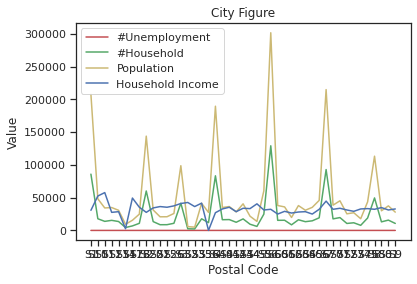

In [97]:
sns.set(style = 'ticks') #white background

sns.lineplot(x = 'postal_code', y = 'Unemployment', data = df_population, color = 'r', label = '#Unemployment')
sns.lineplot(x = 'postal_code', y = 'Household', data = df_population, color = 'g', label = '#Household')
sns.lineplot(x = 'postal_code', y = 'Population', data = df_population, color = 'y', label = 'Population')
sns.lineplot(x = 'postal_code', y = 'Household Income', data = df_population, color = 'b', label = 'Household Income')

plt.title ('City Figure')
plt.xlabel ('Postal Code')
plt.ylabel ('Value')

In [98]:
#Calculate the mean
df_population_mean = df_population[{'Household','Population','Household Income'}]
df_population_mean = df_population_mean.sum().reset_index().T
df_population_mean = df_population_mean.rename(columns=df_population_mean.iloc[0]).drop(df_population_mean.index[0])
df_population_mean

,Household Income,Household,Population
0,1474720,1033258,2418344


In [99]:
df_population['Employment'] = 1- df_population['Unemployment']
df_population['Household_mean'] = df_population['Household'] / df_population_mean['Household'][0]
df_population['Population_mean'] = df_population['Population'] / df_population_mean['Population'][0]
df_population['Household_Income_mean'] = df_population['Household Income'] / df_population_mean['Household Income'][0]
df_population.drop(['Unemployment','Household','Population','Household Income'], axis=1, inplace=True)

In [113]:
df_population.sort_values(by=['Household_Income_mean', axis=1,'Employment'], ascending=False)
df_population

,postal_code,Employment,Household_mean,Population_mean,Household_Income_mean
0,S1,0.9220,0.083115,0.085890,0.020804
1,S2,0.8950,0.058249,0.059500,0.018688
2,S3,0.8960,0.040185,0.040839,0.027856
3,S4,0.8200,0.080678,0.078382,0.018336
4,S5,0.8780,0.024040,0.025003,0.021157
5,S6,0.9430,0.124999,0.124747,0.021862
6,S7,0.9370,0.089893,0.088874,0.030324
7,S8,0.9440,0.047981,0.046845,0.021862
8,S9,0.8620,0.010312,0.011538,0.022214
9,S10,0.9670,0.017219,0.019938,0.035614


In [170]:
postal_code_merged = my_concern.join(df_population.set_index('postal_code'), on='Neighborhood', how='left')
postal_code_merged

,Neighborhood,Pharmacy,Convenience Store,Supermarket,Grocery Store,English Restaurant,Indian Restaurant,Chinese Restaurant,Pub,Asian Restaurant,Bar,Fast Food Restaurant,Restaurant,Fried Chicken Joint,Fast Food Restaurant,Flea Market,Pizza Place,Employment,Household_mean,Population_mean,Household_Income_mean
0,S1,0.010000,0.000000,0.000000,0.000000,0.01,0.020000,0.020000,0.090000,0.010000,0.090000,0.000000,0.020000,0.01,0.000000,0.000000,0.020000,0.9220,0.083115,0.085890,0.020804
1,S10,0.000000,0.000000,0.000000,0.250000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.9670,0.017219,0.019938,0.035614
2,S11,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.9590,0.013368,0.014170,0.039140
3,S12,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.9460,0.014869,0.014430,0.018688
4,S13,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.250000,0.000000,0.250000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.9350,0.013145,0.012698,0.019394
5,S14,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.9090,0.004253,0.003897,0.001763
6,S17,0.000000,0.000000,0.000000,0.250000,0.00,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.9720,0.006663,0.006402,0.033498
7,S18,0.000000,0.000000,0.000000,0.125000,0.00,0.000000,0.125000,0.000000,0.000000,0.125000,0.000000,0.000000,0.00,0.000000,0.000000,0.125000,0.9740,0.010482,0.010279,0.023977
8,S2,0.000000,0.000000,0.000000,0.166667,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.166667,0.8950,0.058249,0.059500,0.018688
9,S21,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.210526,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.052632,0.052632,0.9570,0.008429,0.008592,0.024683


## Crime Rate

Crime rate also an important factor to me.

In [172]:
#Read data
df=pd.read_csv('Crime.csv')

#Collect Postal Code mapping
df_crime = df[{'Postal Code', 'Crime Dec2020'}]
df_crime.set_index('Postal Code')
df_crime.rename(columns={"Postal Code": "postal_code"}, inplace=True)
df_crime

,postal_code,Crime Dec2020
0,S1,223
1,S2,585
2,S3,221
3,S4,222
4,S5,752
5,S6,405
6,S7,78
7,S8,325
8,S9,362
9,S10,196


Text(0, 0.5, 'Value')

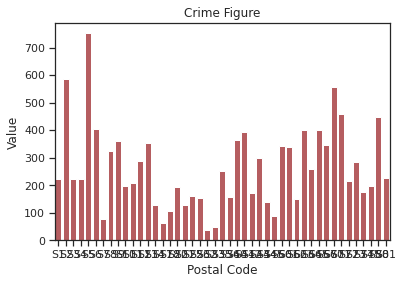

In [173]:
sns.set(style = 'ticks') #white background

sns.barplot(x = 'postal_code', y = 'Crime Dec2020', data = df_crime, color = 'r', label = '#Crime')

plt.title ('Crime Figure')
plt.xlabel ('Postal Code')
plt.ylabel ('Value')

In [174]:
df_crime_mean = df_crime[{'Crime Dec2020'}]
df_crime_mean = df_crime_mean.sum().reset_index().T
df_crime_mean = df_crime_mean.rename(columns=df_crime_mean.iloc[0]).drop(df_crime_mean.index[0])
df_crime_mean

,Crime Dec2020
0,11905


In [175]:
df_crime['crime_mean'] = (1 - (df_crime['Crime Dec2020'] / df_crime_mean['Crime Dec2020'][0])) /1000
#df_crime['crime_mean'] = (df_crime['Crime Dec2020'] / df_crime_mean['Crime Dec2020'][0])*-1
df_crime.drop(['Crime Dec2020'], axis=1, inplace=True)
df_crime


,postal_code,crime_mean
0,S1,0.000981
1,S2,0.000951
2,S3,0.000981
3,S4,0.000981
4,S5,0.000937
5,S6,0.000966
6,S7,0.000993
7,S8,0.000973
8,S9,0.000970
9,S10,0.000984


In [176]:
postal_code_merged = postal_code_merged.join(df_crime.set_index('postal_code'), on='Neighborhood', how='left')
postal_code_merged

,Neighborhood,Pharmacy,Convenience Store,Supermarket,Grocery Store,English Restaurant,Indian Restaurant,Chinese Restaurant,Pub,Asian Restaurant,Bar,Fast Food Restaurant,Restaurant,Fried Chicken Joint,Fast Food Restaurant,Flea Market,Pizza Place,Employment,Household_mean,Population_mean,Household_Income_mean,crime_mean
0,S1,0.010000,0.000000,0.000000,0.000000,0.01,0.020000,0.020000,0.090000,0.010000,0.090000,0.000000,0.020000,0.01,0.000000,0.000000,0.020000,0.9220,0.083115,0.085890,0.020804,0.000981
1,S10,0.000000,0.000000,0.000000,0.250000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.9670,0.017219,0.019938,0.035614,0.000984
2,S11,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.9590,0.013368,0.014170,0.039140,0.000983
3,S12,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.9460,0.014869,0.014430,0.018688,0.000976
4,S13,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.250000,0.000000,0.250000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.9350,0.013145,0.012698,0.019394,0.000970
5,S14,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.9090,0.004253,0.003897,0.001763,0.000989
6,S17,0.000000,0.000000,0.000000,0.250000,0.00,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.9720,0.006663,0.006402,0.033498,0.000995
7,S18,0.000000,0.000000,0.000000,0.125000,0.00,0.000000,0.125000,0.000000,0.000000,0.125000,0.000000,0.000000,0.00,0.000000,0.000000,0.125000,0.9740,0.010482,0.010279,0.023977,0.000991
8,S2,0.000000,0.000000,0.000000,0.166667,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.166667,0.8950,0.058249,0.059500,0.018688,0.000951
9,S21,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.210526,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.052632,0.052632,0.9570,0.008429,0.008592,0.024683,0.000989


## Cluster Postal Code

This is the final step to make the model and render the result.

In [177]:
# set number of clusters

postal_code_grouped_clustering = postal_code_merged.drop('Neighborhood', 1)

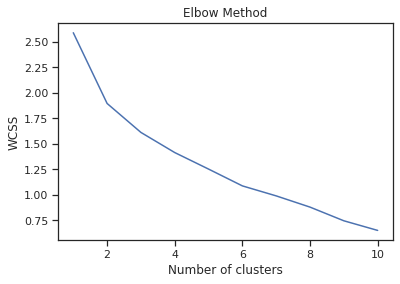

In [178]:
import matplotlib.pyplot as plt
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(postal_code_grouped_clustering)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
            

The optimal for the dataset is 6

In [166]:
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(postal_code_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 0, 4, 3, 1, 3, 4, 0, 0, 4], dtype=int32)

#### Create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood

In [167]:
postal_code_merged.head()

,Neighborhood,Pharmacy,Convenience Store,Supermarket,Grocery Store,English Restaurant,Indian Restaurant,Chinese Restaurant,Pub,Asian Restaurant,Bar,Fast Food Restaurant,Restaurant,Fried Chicken Joint,Fast Food Restaurant,Flea Market,Pizza Place,Employment,Household_mean,Population_mean,Household_Income_mean,crime_mean
0,S1,0.01,0.0,0.0,0.00,0.01,0.02,0.02,0.090000,0.01,0.09,0.0,0.02,0.01,0.0,0.0,0.02,0.922,0.083115,0.085890,0.020804,-0.018732
1,S10,0.00,0.0,0.0,0.25,0.00,0.00,0.00,0.000000,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.967,0.017219,0.019938,0.035614,-0.016464
2,S11,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.333333,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.959,0.013368,0.014170,0.039140,-0.017472
3,S12,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.946,0.014869,0.014430,0.018688,-0.024108
4,S13,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.250000,0.00,0.25,0.0,0.00,0.00,0.0,0.0,0.00,0.935,0.013145,0.012698,0.019394,-0.029819


In [168]:
# add clustering labels
final_result = postal_code_merged.copy()
final_result.insert(0, 'Cluster Labels', kmeans.labels_)

In [169]:
final_result.sort_values(by=['Cluster Labels','Neighborhood'], inplace=True)
final_result

,Cluster Labels,Neighborhood,Pharmacy,Convenience Store,Supermarket,Grocery Store,English Restaurant,Indian Restaurant,Chinese Restaurant,Pub,Asian Restaurant,Bar,Fast Food Restaurant,Restaurant,Fried Chicken Joint,Fast Food Restaurant,Flea Market,Pizza Place,Employment,Household_mean,Population_mean,Household_Income_mean,crime_mean
1,0,S10,0.000000,0.000000,0.000000,0.250000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.9670,0.017219,0.019938,0.035614,-0.016464
7,0,S18,0.000000,0.000000,0.000000,0.125000,0.00,0.000000,0.125000,0.000000,0.000000,0.125000,0.000000,0.000000,0.00,0.000000,0.000000,0.125000,0.9740,0.010482,0.010279,0.023977,-0.008988
8,0,S2,0.000000,0.000000,0.000000,0.166667,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.166667,0.8950,0.058249,0.059500,0.018688,-0.049139
21,0,S5,0.000000,0.000000,0.000000,0.250000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.8780,0.024040,0.025003,0.021157,-0.063167
23,0,S60,0.000000,0.000000,0.000000,0.250000,0.00,0.000000,0.250000,0.250000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.9080,0.014906,0.015716,0.016925,-0.028643
25,0,S62,0.000000,0.000000,0.000000,0.250000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.9140,0.008264,0.008176,0.017983,-0.012516
27,0,S64,0.000000,0.000000,0.125000,0.125000,0.00,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.9250,0.012901,0.012740,0.019394,-0.021840
31,0,S70,0.000000,0.000000,0.000000,0.250000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.9240,0.017060,0.015935,0.021862,-0.046871
4,1,S13,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.250000,0.000000,0.250000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.9350,0.013145,0.012698,0.019394,-0.029819
24,1,S61,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.333333,0.000000,0.333333,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.9190,0.015016,0.014831,0.019746,-0.028391


In [185]:
# merge with df_zipcode to add latitude/longitude for each neighborhood
final_result = df_area_xy.join(final_result.set_index('Neighborhood'), on='postal_code', how='right')

final_result # check the last columns!

,area,postal_code,latitude,longitude,Cluster Labels,Pharmacy,Convenience Store,Supermarket,Grocery Store,English Restaurant,Indian Restaurant,Chinese Restaurant,Pub,Asian Restaurant,Bar,Fast Food Restaurant,Restaurant,Fried Chicken Joint,Fast Food Restaurant,Flea Market,Pizza Place,Employment,Household_mean,Population_mean,Household_Income_mean,crime_mean
45,Fulwood,S10,53.365013,-1.543243,0,0.000000,0.000000,0.000000,0.250000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.9670,0.017219,0.019938,0.035614,-0.016464
77,Dronfield,S18,53.301481,-1.469437,0,0.000000,0.000000,0.000000,0.125000,0.00,0.000000,0.125000,0.000000,0.000000,0.125000,0.000000,0.000000,0.00,0.000000,0.000000,0.125000,0.9740,0.010482,0.010279,0.023977,-0.008988
6,Arbourthorne,S2,53.361389,-1.443123,0,0.000000,0.000000,0.000000,0.166667,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.166667,0.8950,0.058249,0.059500,0.018688,-0.049139
21,Firth Park,S5,53.418435,-1.446296,0,0.000000,0.000000,0.000000,0.250000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.8780,0.024040,0.025003,0.021157,-0.063167
140,"Moorgate, Rotherham",S60,53.423740,-1.353144,0,0.000000,0.000000,0.000000,0.250000,0.00,0.000000,0.250000,0.250000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.9080,0.014906,0.015716,0.016925,-0.028643
151,Rawmarsh,S62,53.459894,-1.337666,0,0.000000,0.000000,0.000000,0.250000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.9140,0.008264,0.008176,0.017983,-0.012516
159,Mexborough,S64,53.490856,-1.288887,0,0.000000,0.000000,0.125000,0.125000,0.00,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.9250,0.012901,0.012740,0.019394,-0.021840
171,Barnsley,S70,53.420775,-1.454962,0,0.000000,0.000000,0.000000,0.250000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.9240,0.017060,0.015935,0.021862,-0.046871
62,Handsworth,S13,53.372300,-1.383012,1,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.250000,0.000000,0.250000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.9350,0.013145,0.012698,0.019394,-0.029819
146,Kimberworth Park,S61,53.450162,-1.398211,1,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.333333,0.000000,0.333333,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.9190,0.015016,0.014831,0.019746,-0.028391


In [186]:
final_result.dtypes

area                      object
postal_code               object
latitude                 float64
longitude                float64
Cluster Labels             int32
Pharmacy                 float64
Convenience Store        float64
Supermarket              float64
Grocery Store            float64
English Restaurant       float64
Indian Restaurant        float64
Chinese Restaurant       float64
Pub                      float64
Asian Restaurant         float64
Bar                      float64
Fast Food Restaurant     float64
Restaurant               float64
Fried Chicken Joint      float64
Fast Food Restaurant     float64
Flea Market              float64
Pizza Place              float64
Employment               float64
Household_mean           float64
Population_mean          float64
Household_Income_mean    float64
crime_mean               float64
dtype: object

In [187]:
#Get coordinate for Sheffield City Centre
address = 'Sheffield S1, United Kingdom'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(address, latitude, longitude))

The geograpical coordinate of Sheffield S1, United Kingdom are 53.3783713, -1.4621381.


In [191]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, area, postal_code, cluster in zip(final_result['latitude'], final_result['longitude'], final_result['area'] ,final_result['postal_code'], final_result['Cluster Labels']):
    label = folium.Popup(str(area)+ ','+str(postal_code) + '- Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examine Clusters

#### Cluster 1

In [192]:
final_result.loc[final_result['Cluster Labels'] == 0, final_result.columns[[0] + [1] + list(range(5, final_result.shape[1]))]]

,area,postal_code,Pharmacy,Convenience Store,Supermarket,Grocery Store,English Restaurant,Indian Restaurant,Chinese Restaurant,Pub,Asian Restaurant,Bar,Fast Food Restaurant,Fast Food Restaurant,Restaurant,Fried Chicken Joint,Fast Food Restaurant,Fast Food Restaurant,Flea Market,Pizza Place,Employment,Household_mean,Population_mean,Household_Income_mean,crime_mean
45,Fulwood,S10,0.0,0.0,0.000,0.250000,0.0,0.0,0.000,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.967,0.017219,0.019938,0.035614,-0.016464
77,Dronfield,S18,0.0,0.0,0.000,0.125000,0.0,0.0,0.125,0.000,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125000,0.974,0.010482,0.010279,0.023977,-0.008988
6,Arbourthorne,S2,0.0,0.0,0.000,0.166667,0.0,0.0,0.000,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.895,0.058249,0.059500,0.018688,-0.049139
21,Firth Park,S5,0.0,0.0,0.000,0.250000,0.0,0.0,0.000,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.878,0.024040,0.025003,0.021157,-0.063167
140,"Moorgate, Rotherham",S60,0.0,0.0,0.000,0.250000,0.0,0.0,0.250,0.250,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.908,0.014906,0.015716,0.016925,-0.028643
151,Rawmarsh,S62,0.0,0.0,0.000,0.250000,0.0,0.0,0.000,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.914,0.008264,0.008176,0.017983,-0.012516
159,Mexborough,S64,0.0,0.0,0.125,0.125000,0.0,0.0,0.000,0.125,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.925,0.012901,0.012740,0.019394,-0.021840
171,Barnsley,S70,0.0,0.0,0.000,0.250000,0.0,0.0,0.000,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.924,0.017060,0.015935,0.021862,-0.046871


#### Cluster 2 ~ 5

In [193]:
final_result.loc[final_result['Cluster Labels'] == 1, final_result.columns[[0] + [1] + list(range(5, final_result.shape[1]))]]

,area,postal_code,Pharmacy,Convenience Store,Supermarket,Grocery Store,English Restaurant,Indian Restaurant,Chinese Restaurant,Pub,Asian Restaurant,Bar,Fast Food Restaurant,Fast Food Restaurant,Restaurant,Fried Chicken Joint,Fast Food Restaurant,Fast Food Restaurant,Flea Market,Pizza Place,Employment,Household_mean,Population_mean,Household_Income_mean,crime_mean
62,Handsworth,S13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.0,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.935,0.013145,0.012698,0.019394,-0.029819
146,Kimberworth Park,S61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.919,0.015016,0.014831,0.019746,-0.028391


In [194]:
final_result.loc[final_result['Cluster Labels'] == 2, final_result.columns[[0] + [1] + list(range(5, final_result.shape[1]))]]

,area,postal_code,Pharmacy,Convenience Store,Supermarket,Grocery Store,English Restaurant,Indian Restaurant,Chinese Restaurant,Pub,Asian Restaurant,Bar,Fast Food Restaurant,Fast Food Restaurant,Restaurant,Fried Chicken Joint,Fast Food Restaurant,Fast Food Restaurant,Flea Market,Pizza Place,Employment,Household_mean,Population_mean,Household_Income_mean,crime_mean
13,Burngreave,S3,0.0,0.0,0.200000,0.000000,0.0,0.2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8960,0.040185,0.040839,0.027856,-0.018564
115,Stocksbridge,S36,0.0,0.0,0.285714,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9965,0.011501,0.011350,0.000000,-0.013356
126,Clay Cross,S42,0.0,0.0,0.333333,0.166667,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9570,0.012035,0.011681,0.019394,-0.014532
138,Clay Cross,S45,0.0,0.0,0.333333,0.166667,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9460,0.005925,0.005676,0.027504,-0.007308
162,Rotherham,S65,0.0,0.0,0.200000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.8950,0.014177,0.014565,0.016925,-0.033599
188,Hoyland,S74,0.0,0.0,0.166667,0.166667,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9390,0.007504,0.007377,0.022214,-0.014616


In [195]:
final_result.loc[final_result['Cluster Labels'] == 3, final_result.columns[[0] + [1] + list(range(5, final_result.shape[1]))]]

,area,postal_code,Pharmacy,Convenience Store,Supermarket,Grocery Store,English Restaurant,Indian Restaurant,Chinese Restaurant,Pub,Asian Restaurant,Bar,Fast Food Restaurant,Fast Food Restaurant,Restaurant,Fried Chicken Joint,Fast Food Restaurant,Fast Food Restaurant,Flea Market,Pizza Place,Employment,Household_mean,Population_mean,Household_Income_mean,crime_mean
0,Orchard Square,S1,0.010000,0.000000,0.000000,0.000000,0.01,0.020000,0.020000,0.090000,0.010000,0.090000,0.000000,0.000000,0.020000,0.01,0.000000,0.000000,0.0,0.020000,0.922,0.083115,0.085890,0.020804,-0.018732
55,Hackenthorpe,S12,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.946,0.014869,0.014430,0.018688,-0.024108
68,Rollestone,S14,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.909,0.004253,0.003897,0.001763,-0.010920
18,Grimesthorpe,S4,0.333333,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.820,0.080678,0.078382,0.018336,-0.018648
135,Bolsover,S44,0.027027,0.000000,0.000000,0.081081,0.00,0.027027,0.027027,0.054054,0.027027,0.054054,0.027027,0.027027,0.027027,0.00,0.027027,0.027027,0.0,0.027027,0.994,0.009151,0.008974,0.022567,-0.011676
26,Hillsborough,S6,0.000000,0.000000,0.083333,0.000000,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0.250000,0.250000,0.000000,0.00,0.250000,0.250000,0.0,0.000000,0.943,0.124999,0.124747,0.021862,-0.034019
167,Maltby,S66,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.944,0.018627,0.018962,0.021862,-0.029063
31,Beauchief,S7,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.937,0.089893,0.088874,0.030324,-0.006552
176,Royston,S71,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.929,0.018961,0.018698,0.022920,-0.038555
183,Darfield,S73,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.930,0.011287,0.011155,0.019746,-0.023940


In [196]:
final_result.loc[final_result['Cluster Labels'] == 4, final_result.columns[[0] + [1] + list(range(5, final_result.shape[1]))]]

,area,postal_code,Pharmacy,Convenience Store,Supermarket,Grocery Store,English Restaurant,Indian Restaurant,Chinese Restaurant,Pub,Asian Restaurant,Bar,Fast Food Restaurant,Fast Food Restaurant,Restaurant,Fried Chicken Joint,Fast Food Restaurant,Fast Food Restaurant,Flea Market,Pizza Place,Employment,Household_mean,Population_mean,Household_Income_mean,crime_mean
51,Ecclesall,S11,0.0,0.00,0.000000,0.00,0.0,0.000000,0.0,0.333333,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.9590,0.013368,0.014170,0.039140,-0.017472
72,Dore,S17,0.0,0.00,0.000000,0.25,0.0,0.000000,0.0,0.500000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.9720,0.006663,0.006402,0.033498,-0.005376
85,Staveley,S21,0.0,0.00,0.000000,0.00,0.0,0.000000,0.0,0.210526,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.052632,0.052632,0.9570,0.008429,0.008592,0.024683,-0.010752
103,Hathersage,S32,0.0,0.00,0.000000,0.00,0.0,0.111111,0.0,0.222222,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.9970,0.002454,0.002405,0.028914,-0.003024
110,Ecclesfield,S35,0.0,0.00,0.200000,0.00,0.0,0.000000,0.0,0.200000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.9959,0.017160,0.017113,0.028209,-0.021252
118,Chesterfield,S40,0.0,0.00,0.050000,0.05,0.0,0.000000,0.0,0.150000,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.9950,0.015814,0.014461,0.022214,-0.030491
122,Old Whittington,S41,0.0,0.25,0.000000,0.00,0.0,0.000000,0.0,0.250000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.9460,0.016012,0.015073,0.023977,-0.033011
130,Staveley,S43,0.0,0.00,0.000000,0.00,0.0,0.000000,0.0,0.210526,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.052632,0.052632,0.9400,0.017005,0.016778,0.022920,-0.025199
155,Wath upon Dearne,S63,0.0,0.00,0.285714,0.00,0.0,0.000000,0.0,0.428571,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.9190,0.015712,0.015675,0.019041,-0.033683
180,"Brierley, Barnsley",S72,0.0,0.00,0.000000,0.00,0.0,0.000000,0.0,0.500000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.9280,0.010294,0.010475,0.021157,-0.018060


,area,postal_code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


## Conclusions

The conclusions shown that S1, S10 is the best area to live.

Thanks